In [18]:
from rdkit import Chem

Obtener datos Molecula

In [46]:
#mol = Chem.MolFromSmiles('CC(C)C')
mol = Chem.MolFromSmiles('CCCC(=O)OC[C@@H]1CC[C@H](n2cnc3c(=O)nc[nH]c32)O1')
#mol = Chem.AddHs(mol)

adj_matrix = Chem.GetAdjacencyMatrix(mol)

feature_matrix = []

for i, atom in enumerate(mol.GetAtoms()):
    atom_num = atom.GetAtomicNum()
    atom_mass = atom.GetMass()
    atom_val = atom.GetTotalValence()
    atomDeg = atom.GetDegree()
    atomHs = atom.GetNumImplicitHs()
    atomHyb = atom.GetHybridization()-1
    atomArom = atom.GetIsAromatic()+0

    feature_matrix.append([atom_num, atom_mass, atom_val, atomDeg, atomHs, atomHyb, atomArom])

nodesym = [atom.GetSymbol() for atom in mol.GetAtoms()]

Graficar

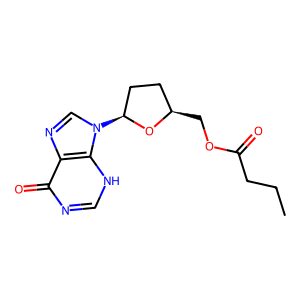

In [47]:
from rdkit.Chem import Draw

Draw.MolToImage(mol)

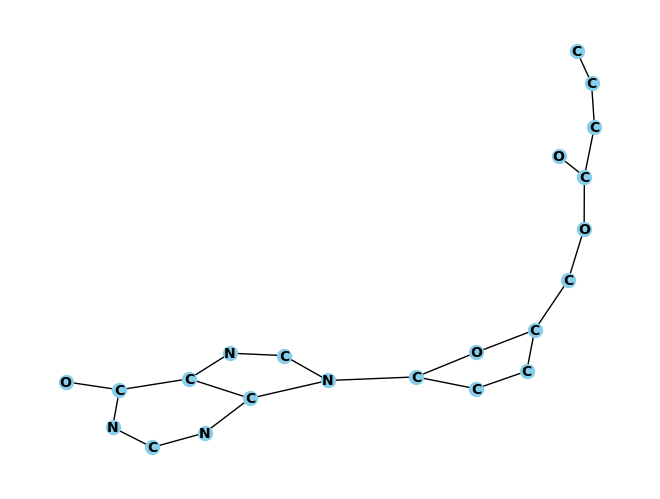

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph(adj_matrix)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=10, font_weight='bold', font_color='black', labels=dict(zip(range(len(nodesym)), nodesym)))